#Project Topic: AI-driven market access platforms connecting farmers directly to buyers, predicting market prices and optimizing crop sales.

##Team Members: Ved, Eeshan and Shubham

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "Dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (1868, 10)

First 5 rows:
            State    District                   Market            Commodity  \
0  Andhra Pradesh     Krishna                 Tiruvuru                Maize   
1  Andhra Pradesh     Krishna                 Tiruvuru  Paddy(Dhan)(Common)   
2  Andhra Pradesh     Nellore             Atmakur(SPS)               Cotton   
3      Chandigarh  Chandigarh  Chandigarh(Grain/Fruit)         Bottle gourd   
4      Chandigarh  Chandigarh  Chandigarh(Grain/Fruit)         Green Chilli   

        Variety    Grade Arrival_Date  Min_x0020_Price  Max_x0020_Price  \
0  Hybrid/Local      FAQ   12/09/2025             2300             2400   
1          Sona  Non-FAQ   12/09/2025             2200             2400   
2         Local      FAQ   12/09/2025             7121             7600   
3  Bottle Gourd      FAQ   12/09/2025             2500             3500   
4         Other      FAQ   12/09/2025             2000             3500   

   Modal_x0020_Price  
0         

In [ ]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              1868 non-null   object
 1   District           1868 non-null   object
 2   Market             1868 non-null   object
 3   Commodity          1868 non-null   object
 4   Variety            1868 non-null   object
 5   Grade              1868 non-null   object
 6   Arrival_Date       1868 non-null   object
 7   Min_x0020_Price    1868 non-null   int64 
 8   Max_x0020_Price    1868 non-null   int64 
 9   Modal_x0020_Price  1868 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 146.1+ KB
None


In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
State                0
District             0
Market               0
Commodity            0
Variety              0
Grade                0
Arrival_Date         0
Min_x0020_Price      0
Max_x0020_Price      0
Modal_x0020_Price    0
dtype: int64


In [ ]:
#Clean column names
df.rename(columns={
    "Min_x0020_Price": "Min_Price",
    "Max_x0020_Price": "Max_Price",
    "Modal_x0020_Price": "Modal_Price"
}, inplace=True)

In [ ]:
#Convert Arrival_Date to datetime
df["Arrival_Date"] = pd.to_datetime(df["Arrival_Date"], errors="coerce")

In [ ]:
#Remove duplicates (if any)
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"Removed {before - after} duplicate rows")

Removed 0 duplicate rows


In [ ]:
#Strip spaces from text columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

In [ ]:
# Final check
print("\nCleaned dataset info:")
print(df.info())
print("\nSample rows after cleaning:")
print(df.head())


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   State         1868 non-null   object        
 1   District      1868 non-null   object        
 2   Market        1868 non-null   object        
 3   Commodity     1868 non-null   object        
 4   Variety       1868 non-null   object        
 5   Grade         1868 non-null   object        
 6   Arrival_Date  1868 non-null   datetime64[ns]
 7   Min_Price     1868 non-null   int64         
 8   Max_Price     1868 non-null   int64         
 9   Modal_Price   1868 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 146.1+ KB
None

Sample rows after cleaning:
            State    District                   Market            Commodity  \
0  Andhra Pradesh     Krishna                 Tiruvuru                Maize   
1  Andh

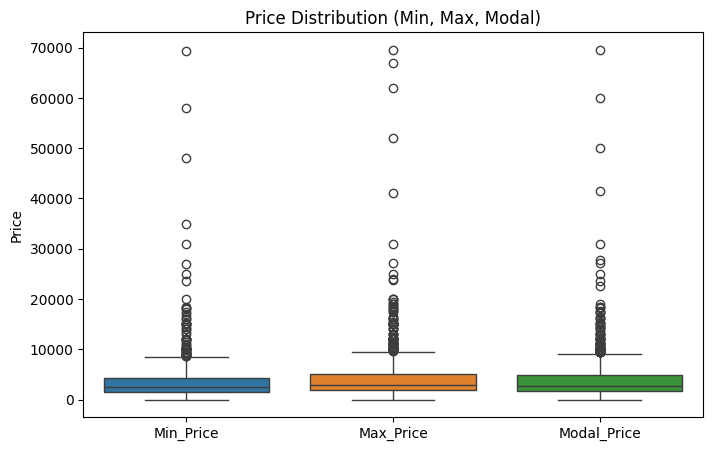

In [ ]:
#Price Distribution (Min, Max, Modal)
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["Min_Price","Max_Price","Modal_Price"]])
plt.title("Price Distribution (Min, Max, Modal)")
plt.ylabel("Price")
plt.show()

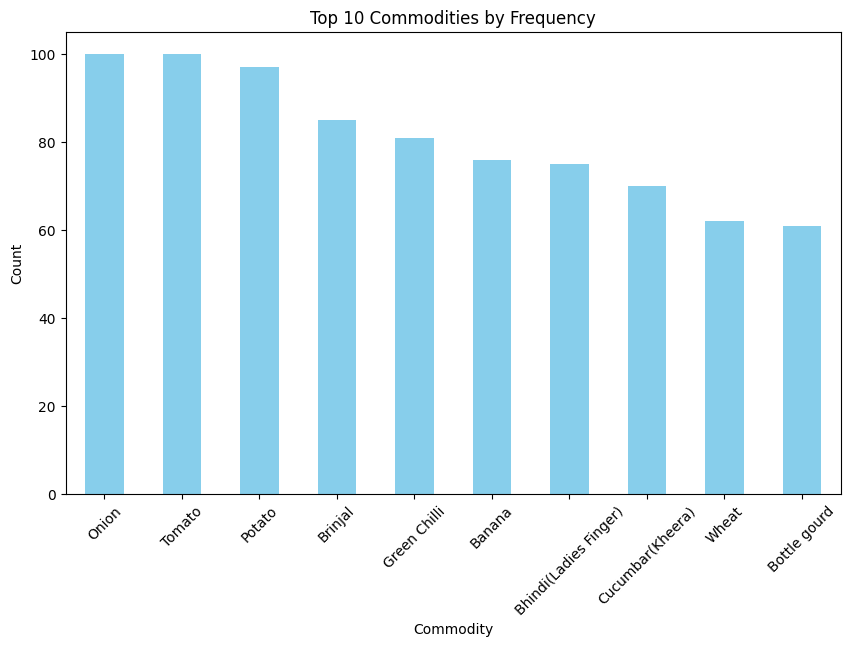

In [ ]:
#Commodity Frequency (Top 10 Commodities)
plt.figure(figsize=(10,6))
df["Commodity"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Commodities by Frequency")
plt.xlabel("Commodity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3345390642.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")


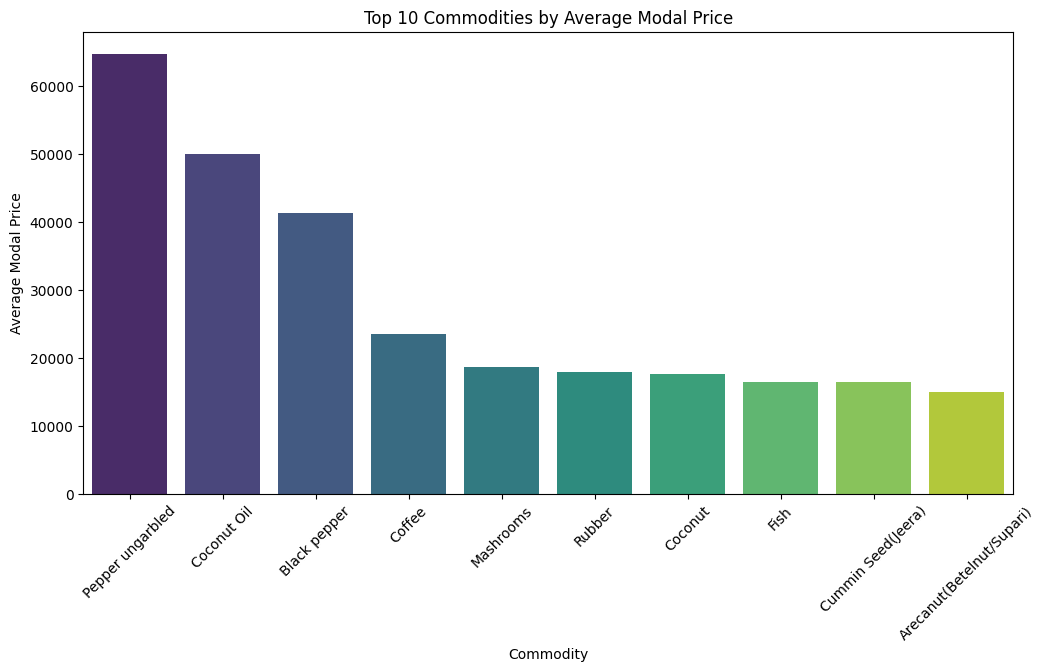

In [ ]:
#Average Modal Price by Commodity (Top 10)
plt.figure(figsize=(12,6))
avg_price = df.groupby("Commodity")["Modal_Price"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")
plt.title("Top 10 Commodities by Average Modal Price")
plt.ylabel("Average Modal Price")
plt.xlabel("Commodity")
plt.xticks(rotation=45)
plt.show()

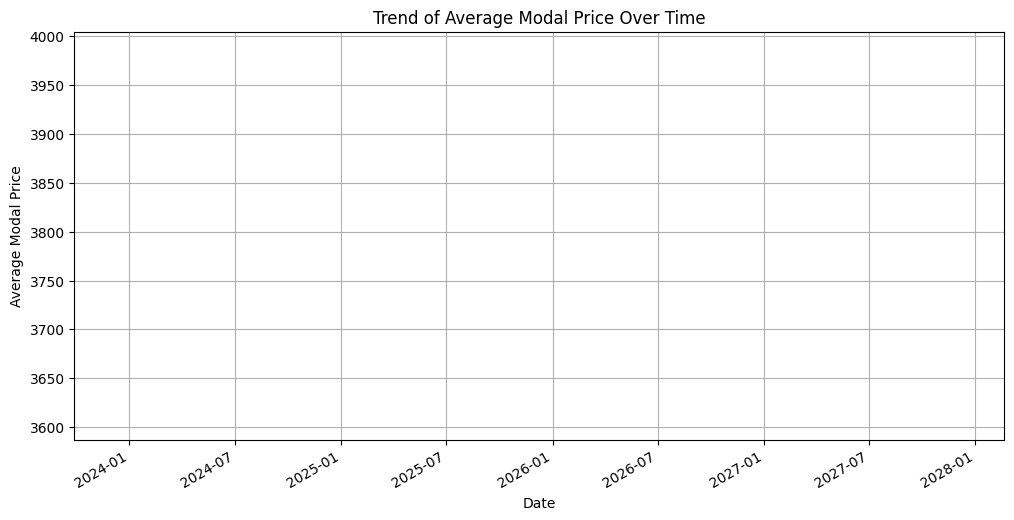

In [ ]:
#Trends Over Time (Modal Price)
plt.figure(figsize=(12,6))
df.groupby("Arrival_Date")["Modal_Price"].mean().plot()
plt.title("Trend of Average Modal Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Modal Price")
plt.grid(True)
plt.show()

/tmp/ipython-input-770120315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_prices.index, y=state_prices.values, palette="magma")


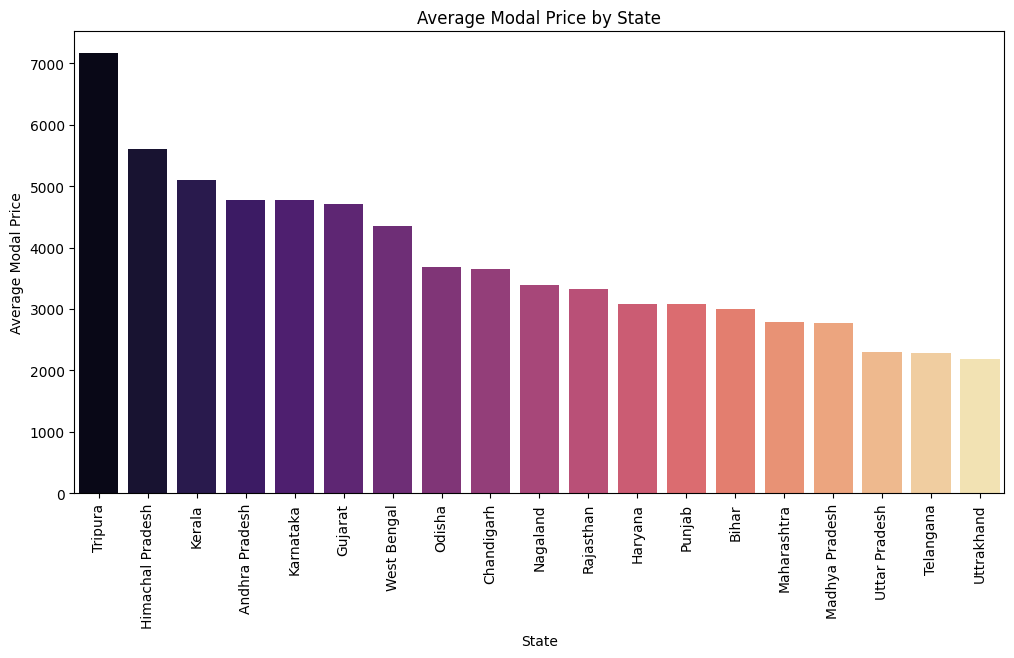

In [ ]:
#State-wise Average Price
plt.figure(figsize=(12,6))
state_prices = df.groupby("State")["Modal_Price"].mean().sort_values(ascending=False)
sns.barplot(x=state_prices.index, y=state_prices.values, palette="magma")
plt.title("Average Modal Price by State")
plt.xticks(rotation=90)
plt.ylabel("Average Modal Price")
plt.show()

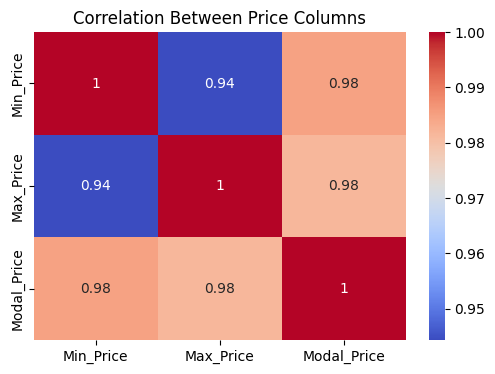

In [ ]:
#Correlation Between Prices
plt.figure(figsize=(6,4))
sns.heatmap(df[["Min_Price","Max_Price","Modal_Price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Price Columns")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Copy dataset
data = df.copy()

In [ ]:
# Extract date features
data["Year"] = data["Arrival_Date"].dt.year
data["Month"] = data["Arrival_Date"].dt.month
data["Day"] = data["Arrival_Date"].dt.day
data["Weekday"] = data["Arrival_Date"].dt.weekday

In [ ]:
# Encode categorical columns
cat_cols = ["State","District","Market","Commodity","Variety","Grade"]
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
# Define features & target
X = data.drop(columns=["Modal_Price","Arrival_Date"])  # keep Min/Max as features
y = data["Modal_Price"]

In [ ]:
# Sort by date first
data = data.sort_values("Arrival_Date")

# 80-20 split by index
split_idx = int(len(data) * 0.8)
train, test = data.iloc[:split_idx], data.iloc[split_idx:]

X_train, y_train = train.drop(columns=["Modal_Price","Arrival_Date"]), train["Modal_Price"]
X_test, y_test   = test.drop(columns=["Modal_Price","Arrival_Date"]), test["Modal_Price"]

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (1494, 12)  Test size: (374, 12)


In [ ]:
# Baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Linear Regression Performance:
MAE: 89.82
RMSE: 177.99
R²: 1.00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [ ]:
# --- Train-Test Split (time-aware) ---
data = data.sort_values("Arrival_Date")  # ensure chronological order
split_idx = int(len(data) * 0.8)
train, test = data.iloc[:split_idx], data.iloc[split_idx:]

X_train, y_train = train.drop(columns=["Modal_Price","Arrival_Date"]), train["Modal_Price"]
X_test, y_test   = test.drop(columns=["Modal_Price","Arrival_Date"]), test["Modal_Price"]

print("Train size:", X_train.shape, " Test size:", X_test.shape)

Train size: (1494, 12)  Test size: (374, 12)


In [ ]:
# --- Define models ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

In [ ]:
# --- Train & Evaluate ---
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R²": r2})

In [ ]:
# --- Results as DataFrame ---
results_df = pd.DataFrame(results)
print("\nModel Comparison Results:")
print(results_df)


Model Comparison Results:
               Model         MAE        RMSE        R²
0  Linear Regression  102.621826  179.325645  0.996513
1      Random Forest  107.116939  285.062853  0.991188
2            XGBoost  113.426086  389.298267  0.983565


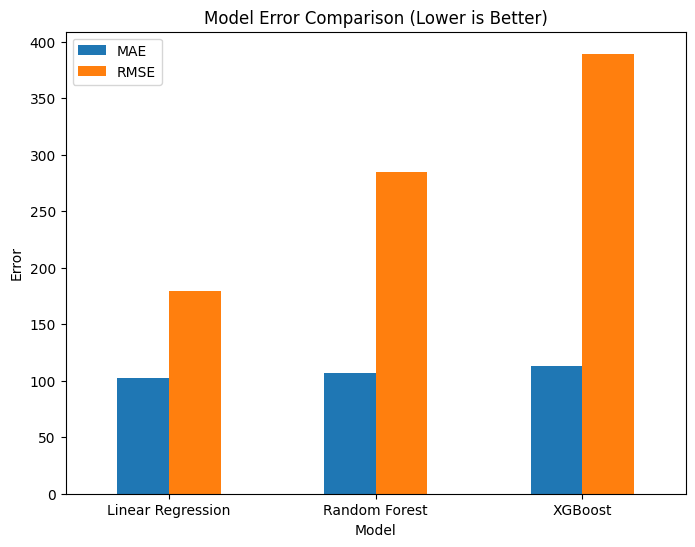

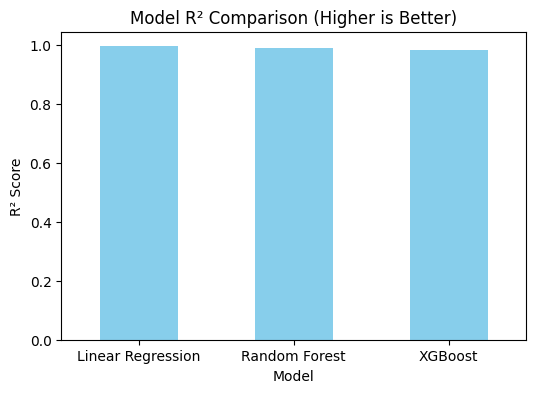

In [ ]:
# --- Bar Plot of Performance ---
import matplotlib.pyplot as plt

results_df.set_index("Model")[["MAE","RMSE"]].plot(kind="bar", figsize=(8,6))
plt.title("Model Error Comparison (Lower is Better)")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.show()

results_df.set_index("Model")["R²"].plot(kind="bar", figsize=(6,4), color="skyblue")
plt.title("Model R² Comparison (Higher is Better)")
plt.ylabel("R² Score")
plt.xticks(rotation=0)
plt.show()